<a href="https://colab.research.google.com/github/Pio2022/dados/blob/main/Ubiratan_Piovezan_Exercicio_1_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Objetivo: criar um modelo de regressão multipla para prever a progressão da diabetes

* identificar variaveis independentes e dependentes
* separar dados de treinamento e teste
* medir o erro
* visualizar de forma gráfica os dados reais e os previstos

## Dataset [Diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

* $N = 442$
* Atributos: 10
    * `age`
    * `sex`
    * `bmi` Índice de Massa Corpórea (IMC) - *Body Mass Index* (BMI)
    * `bp` pressão arterial média *blood pressure* (bp)
    * `s1` colesterol total
    * `s2` colesterol LDL
    * `s3` colesterol HDL
    * `s4` colesterol VLDL
    * `s5` triglicerides
    * `s6` glicose
* Variável dependente: medida quantitativa de progressão da diabetes

Obs: usar test_size = 0.25


In [2]:
# importação de dados de casos de diabetes
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True)
X = diabetes['data']
y = diabetes['target']

In [ ]:
#imprimir valores de X
print(X)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

In [ ]:
#imprimir valores de y
print(y)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


In [3]:
from sklearn.model_selection import train_test_split

#Separe os dados entre treino e teste com proporcao de 75% e 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


Importando o modelo LinearRegression

In [4]:
# importamos um modelo de regressão linear da biblioteca sklearn
from sklearn.linear_model import LinearRegression

In [5]:
#instanciando o modelo 
lm = LinearRegression()


In [6]:
lm.fit(X=X, y=y) 


LinearRegression()

In [7]:
#performance do modelo no treinamento e nos testes
print('R2 for Train', lm.score( X_train, y_train ))
print('R2 for Test', lm.score(X_test, y_test))

R2 for Train 0.5520644910950767
R2 for Test 0.38880043483872373


In [8]:
#faca previsoes com toso dos dados separados para teste X_test
predicted = lm.predict(X_test)

In [9]:
predicted

array([235.3011088 , 245.16192142, 164.32674962, 119.48417359,
       187.18384852, 251.35898288, 115.06673301, 189.19307553,
       142.5193942 , 228.58801706, 166.82129568, 178.55548636,
       106.83424483,  88.1040833 , 244.30370588,  85.80377894,
       155.23013996,  68.07234761,  97.07853583, 222.48172067,
       191.16674356, 157.87686037, 163.01389345, 150.50201654,
       191.33759392, 168.21035724, 129.83264097,  87.12032949,
       193.31777358, 160.67275473, 180.12844365,  84.17453643,
       142.20916765, 144.42617093, 146.64621068, 196.9141296 ,
       165.84341641, 190.66078824, 131.09513588, 206.76300555,
        85.26036769, 165.3872774 , 146.27099383, 182.3042492 ,
       178.70442926,  76.79700486, 146.99720377, 139.1077439 ,
       124.02443772, 236.70948329, 159.9389204 ,  73.89417947,
       157.03563376, 157.01489819, 235.16536625, 177.17236996,
       191.53802295, 114.23779529, 139.54389024, 170.44063216,
       207.8289973 , 169.23161767, 155.66898717, 113.03

In [10]:
import numpy as np
print(np.c_[predicted, y_test])

[[235.3011088  321.        ]
 [245.16192142 215.        ]
 [164.32674962 127.        ]
 [119.48417359  64.        ]
 [187.18384852 175.        ]
 [251.35898288 275.        ]
 [115.06673301 179.        ]
 [189.19307553 232.        ]
 [142.5193942  142.        ]
 [228.58801706  99.        ]
 [166.82129568 252.        ]
 [178.55548636 174.        ]
 [106.83424483 129.        ]
 [ 88.1040833   74.        ]
 [244.30370588 264.        ]
 [ 85.80377894  49.        ]
 [155.23013996  86.        ]
 [ 68.07234761  75.        ]
 [ 97.07853583 101.        ]
 [222.48172067 155.        ]
 [191.16674356 170.        ]
 [157.87686037 276.        ]
 [163.01389345 110.        ]
 [150.50201654 136.        ]
 [191.33759392  68.        ]
 [168.21035724 128.        ]
 [129.83264097 103.        ]
 [ 87.12032949  93.        ]
 [193.31777358 191.        ]
 [160.67275473 196.        ]
 [180.12844365 217.        ]
 [ 84.17453643 181.        ]
 [142.20916765 168.        ]
 [144.42617093 200.        ]
 [146.64621068

In [11]:
print(y_test - predicted)

362    85.698891
249   -30.161921
271   -37.326750
435   -55.484174
400   -12.183849
         ...    
325   -24.222139
366   -21.057188
22    -45.112863
68     45.160304
437   -15.018028
Name: target, Length: 111, dtype: float64


Avaliando o modelo

In [12]:
import math
#podemos avaliar a performance pelo mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = lm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = math.sqrt(mse)
print(rmse)


55.084003442988624


Matplotlib é uma biblioteca utilizada para visualização de dados e plotagem gráfica.


In [13]:
#importando a biblioteca matplotlib
import matplotlib.pyplot as plt


In [14]:
# fazendo a predicao em todos os dados reservados para o teste
predicted = lm.predict(X_test)
expected = y_test

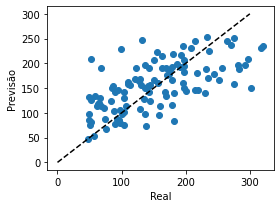

In [15]:
#plotando o grafico com o valor real do preco das casas X o valor predito pelo modelo
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 300], [0, 300], '--k')
plt.axis('tight')
plt.xlabel('Real')
plt.ylabel('Previsão')
plt.tight_layout()